In [58]:
import pandas as pd

import networkx as nx

from scipy.stats import shapiro 

import matplotlib.pyplot as plt

In [2]:
interactome_df = pd.read_csv('./data/Interactome_human.tsv', sep='\t', header=None)
G = nx.from_pandas_edgelist(interactome_df, 0, 1, edge_attr=True)

candidates_MMAF = pd.read_pickle("./data/candidateGenesList_MMAF.p")
candidates_NOA = pd.read_pickle("./data/candidateGenesList_NOA.p")

nonCandidates_MMAF = [n for n in list(G.nodes) if n not in candidates_MMAF]
nonCandidates_NOA = [n for n in list(G.nodes) if n not in candidates_NOA]

In [5]:
res_hc_MMAF = nx.harmonic_centrality(G, nbunch=nonCandidates_MMAF, sources=candidates_MMAF)
res_hc_MMAF_sorted = dict(sorted(res_hc_MMAF.items(), key=lambda v: v[1], reverse=True))

In [6]:
res_hc_NOA = nx.harmonic_centrality(G, nbunch=nonCandidates_NOA, sources=candidates_NOA)
res_hc_NOA_sorted = dict(sorted(res_hc_NOA.items(), key=lambda v: v[1], reverse=True))

Text(0.5, 1.0, 'Harmonic centrality distribution NOA')

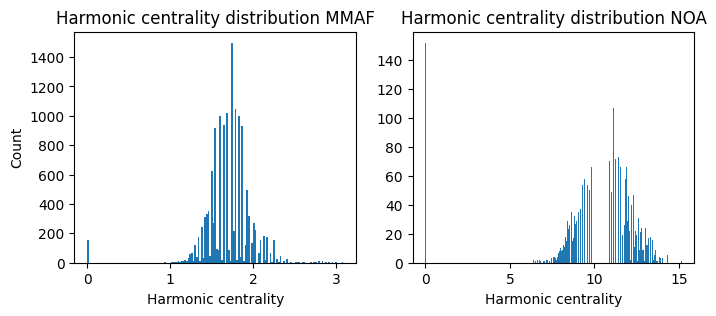

In [16]:
# plot harmonic centrality distribution

res_hc_MMAF_list = [v for k, v in res_hc_MMAF_sorted.items()]
res_hc_NOA_list = [v for k, v in res_hc_NOA_sorted.items()]


fig, axs = plt.subplots(1, 2, figsize=(8, 3))

bins_MMAF = len(set(res_hc_MMAF_list))
axs[0].hist(res_hc_MMAF_list, bins=bins_MMAF)
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Harmonic centrality")
axs[0].set_title("Harmonic centrality distribution MMAF")

bins_NOA = len(set(res_hc_NOA_list))
axs[1].hist(res_hc_NOA_list, bins=bins_NOA)
axs[1].set_xlabel("Harmonic centrality")
axs[1].set_title("Harmonic centrality distribution NOA")

In [21]:
shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)

/tmp/ipykernel_19662/2781368214.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14458.
  shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)
/tmp/ipykernel_19662/2781368214.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14425.
  shapiro(res_hc_MMAF_list), shapiro(res_hc_NOA_list)


(ShapiroResult(statistic=0.8406906116505836, pvalue=6.4467614927799876e-80),
 ShapiroResult(statistic=0.8224171465557699, pvalue=2.68232130306255e-82))

In [47]:
df_MMAF = pd.DataFrame.from_dict(res_hc_MMAF_sorted, orient='index', columns=['HC_MMAF'])
df_NOA = pd.DataFrame.from_dict(res_hc_NOA_sorted, orient='index', columns=['HC_NOA'])

In [48]:
len(df_MMAF.index), len(df_NOA.index)

(14458, 14425)

In [81]:
df = pd.merge(df_MMAF, df_NOA, left_index=True, right_index=True, how='outer')

In [82]:
df['DIFF'] = abs(df['HC_MMAF'] - df['HC_NOA'])

In [97]:
# non-candidate genes potentially responsible for NOA
df.sort_values(by='DIFF', ascending=False)

,HC_MMAF,HC_NOA,DIFF
ENSG00000170365,1.916667,15.166667,13.250000
ENSG00000097007,1.950000,14.783333,12.833333
ENSG00000163513,2.000000,14.666667,12.666667
ENSG00000170312,2.000000,14.500000,12.500000
ENSG00000112062,1.916667,14.333333,12.416667
...,...,...,...
ENSG00000187713,1.683333,NaN,NaN
ENSG00000188738,NaN,8.416667,NaN
ENSG00000196584,1.766667,NaN,NaN
ENSG00000204410,1.733333,NaN,NaN


In [100]:
df.sort_values(by=['HC_MMAF', 'DIFF'], ascending=[False, True])

,HC_MMAF,HC_NOA,DIFF
ENSG00000155875,3.083333,12.616667,9.533333
ENSG00000172053,3.083333,13.166667,10.083333
ENSG00000174099,3.000000,12.816667,9.816667
ENSG00000166886,3.000000,12.816667,9.816667
ENSG00000068024,3.000000,12.950000,9.950000
...,...,...,...
ENSG00000124721,NaN,9.750000,NaN
ENSG00000129646,NaN,10.883333,NaN
ENSG00000130413,NaN,9.800000,NaN
ENSG00000137473,NaN,9.833333,NaN
